<a href="https://colab.research.google.com/github/Akshara-416/sales_prediction/blob/data_exploration/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import required libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [2]:
import functions
importlib.reload(functions)
from functions import input_read

## Social Media Data

In [3]:
df_sm = input_read('files/social_media_data.xlsx')

Shape of social_media_data : (533390, 3)

List of columns in social_media_data : Index(['Theme Id', 'published_date', 'total_post'], dtype='object')

Datatype of columns in social_media_data :
Theme Id          float64
published_date     object
total_post          int64
dtype: object


In [4]:
df_sm_bkp = df_sm.copy()

In [6]:
df_sm.head()

,Theme Id,published_date,total_post
0,148.0,2015-01-10 00:00:00,76
1,148.0,2015-10-10 00:00:00,31
2,148.0,2015-11-10 00:00:00,65
3,148.0,2015-12-10 00:00:00,88
4,148.0,10/13/2015,85


In [7]:
print('Size of the data:',df_sm.shape)
print('Total number of unique Theme Ids in Social Media Data:',df_sm['Theme Id'].nunique())
print('List of themes available in Social Media Data:', list(sorted(df_sm['Theme Id'].unique())))
print('Percentage of records with missing values in theme id:',round(df_sm[df_sm['Theme Id'].isnull()].shape[0]*100/df_sm.shape[0],2),'%')

Size of the data: (533390, 3)
Total number of unique Theme Ids in Social Media Data: 193
List of themes available in Social Media Data: [8.0, 15.0, 26.0, 38.0, 39.0, 40.0, 65.0, 75.0, 79.0, 81.0, 100.0, 101.0, 120.0, 125.0, 138.0, 139.0, 142.0, 143.0, 144.0, 145.0, 147.0, 148.0, 151.0, 152.0, 158.0, 163.0, 171.0, 173.0, 177.0, 178.0, 187.0, 191.0, 192.0, 193.0, 197.0, 207.0, 211.0, 220.0, 227.0, 228.0, 384.0, 385.0, 388.0, 393.0, 430.0, 433.0, 437.0, 438.0, 440.0, 441.0, 507.0, 508.0, 509.0, 510.0, 514.0, 516.0, 517.0, 519.0, 521.0, 526.0, 529.0, 531.0, 536.0, 541.0, 543.0, 552.0, 555.0, 556.0, 558.0, 566.0, 567.0, 574.0, 576.0, 583.0, 585.0, 587.0, 593.0, 594.0, 600.0, 601.0, 605.0, 606.0, 608.0, 613.0, 615.0, 616.0, 618.0, 620.0, 622.0, 632.0, 634.0, 650.0, 657.0, 659.0, 668.0, 670.0, 673.0, 677.0, 681.0, 682.0, 683.0, 684.0, 689.0, 702.0, 704.0, 707.0, 713.0, 716.0, 720.0, 727.0, 732.0, 737.0, 738.0, 741.0, 743.0, 747.0, 754.0, 755.0, 761.0, 769.0, 770.0, 776.0, 777.0, 780.0, 782.0,

In [8]:
df_sm.isnull().sum()

Theme Id          218511
published_date         0
total_post             0
dtype: int64

In [10]:
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533390 entries, 0 to 533389
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Theme Id        314879 non-null  float64
 1   published_date  533390 non-null  object 
 2   total_post      533390 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 12.2+ MB


In [11]:
#df_sm.describe()

In [12]:
df_sm['Theme Id'].value_counts(dropna=False)

NaN      218511
788.0      3223
967.0      3223
430.0      1625
26.0       1625
          ...  
543.0      1597
670.0      1511
922.0      1511
576.0      1511
634.0      1511
Name: Theme Id, Length: 194, dtype: int64

In [185]:
df_sm['Theme Id'].value_counts(dropna=False).reset_index().rename(columns={'index':'Theme id', 'Theme Id': 'Count'})

,Theme id,Count
0,NaN,218511
1,788.000,3223
2,967.000,3223
3,430.000,1625
4,26.000,1625
...,...,...
189,543.000,1597
190,670.000,1511
191,922.000,1511
192,576.000,1511


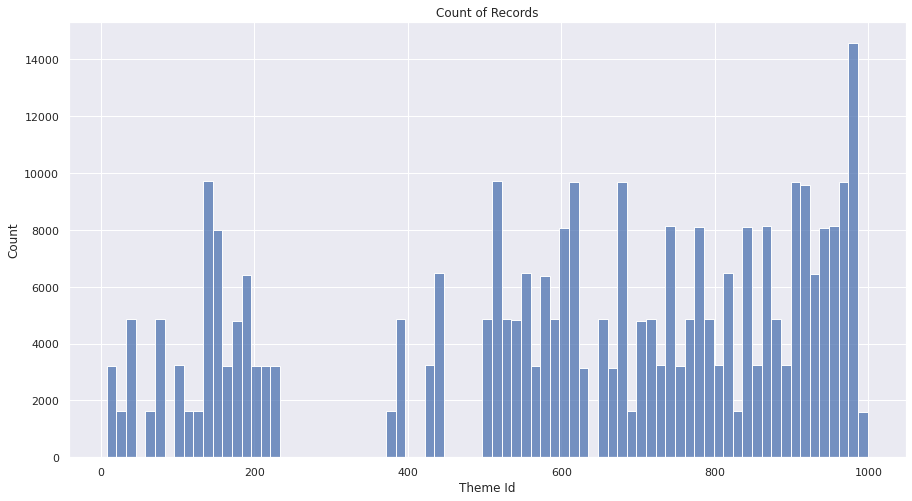

In [106]:
fig = plt.figure() 
fig.set_size_inches(15, 8)
sns.histplot(data=df_sm, x = 'Theme Id')
plt.title('Count of Records')
plt.show()

In [118]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_sm.groupby('Theme Id').sum().reset_index()['total_post'].describe()

count       193.000
mean     211336.601
std      632051.142
min           0.000
25%        3877.000
50%       24946.000
75%      118200.000
max     5329592.000
Name: total_post, dtype: float64

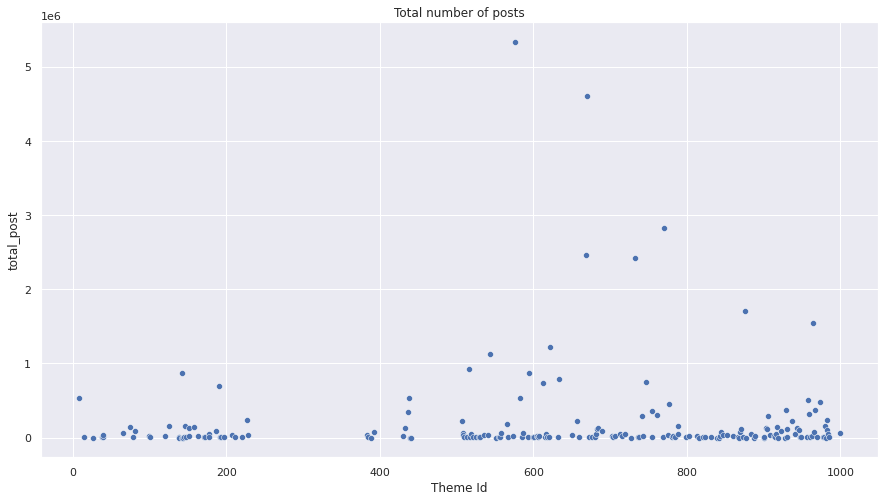

In [119]:
fig = plt.figure() 
fig.set_size_inches(15, 8)
sns.scatterplot(data=df_sm.groupby('Theme Id').sum().reset_index(), x = 'Theme Id',y='total_post')
plt.title('Total number of posts')
plt.show()

In [13]:
df_sm.sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Theme Id      194820061.0
total_post    562377021.0
dtype: float64

In [14]:
521589057*100/562377021.0 # 92% of the total posts dont have Theme ID

92.74722072970332

In [15]:
df_sm.groupby('Theme Id', dropna=False).sum().sort_values(by='total_post', ascending=False)

,total_post
Theme Id,
NaN,521589057
576.0,5329592
670.0,4609405
770.0,2821690
668.0,2462718
...,...
919.0,29
727.0,22
388.0,10


In [16]:
#data = df_sm.groupby('Theme Id').sum().sort_values(by='total_post').reset_index()
#data.describe()

In [17]:
df_sm['published_date']

0         2015-01-10 00:00:00
1         2015-10-10 00:00:00
2         2015-11-10 00:00:00
3         2015-12-10 00:00:00
4                  10/13/2015
                 ...         
533385    2019-05-09 00:00:00
533386    2019-06-09 00:00:00
533387    2019-07-09 00:00:00
533388    2019-08-09 00:00:00
533389    2019-09-09 00:00:00
Name: published_date, Length: 533390, dtype: object

In [18]:
df_sm['published_date'] = df_sm['published_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y') if type(x)==str else x)

In [19]:
df_sm['published_date']

0        2015-01-10
1        2015-10-10
2        2015-11-10
3        2015-12-10
4        2015-10-13
            ...    
533385   2019-05-09
533386   2019-06-09
533387   2019-07-09
533388   2019-08-09
533389   2019-09-09
Name: published_date, Length: 533390, dtype: datetime64[ns]

In [20]:
df_sm['publish_year'] = df_sm['published_date'].apply(lambda x:x.year)
df_sm['publish_month'] = df_sm['published_date'].apply(lambda x:x.month)
df_sm['publish_week'] = df_sm['published_date'].apply(lambda x:x.isocalendar()[1])

In [21]:
df_sm

,Theme Id,published_date,total_post,publish_year,publish_month,publish_week
0,148.0,2015-01-10,76,2015,1,2
1,148.0,2015-10-10,31,2015,10,41
2,148.0,2015-11-10,65,2015,11,46
3,148.0,2015-12-10,88,2015,12,50
4,148.0,2015-10-13,85,2015,10,42
...,...,...,...,...,...,...
533385,876.0,2019-05-09,4658,2019,5,19
533386,876.0,2019-06-09,3731,2019,6,23
533387,876.0,2019-07-09,2336,2019,7,28
533388,876.0,2019-08-09,1374,2019,8,32


In [22]:
#df = df_sm.groupby(['publish_year','Theme Id']).sum()['total_post'].reset_index().sort_values(by=['publish_year','total_post'])
#df[df.publish_year==2017]

In [23]:
df_sm.describe()

,Theme Id,total_post,publish_year,publish_month,publish_week
count,314879.000000,533390.000000,533390.000000,533390.000000,533390.000000
mean,618.714049,1054.344890,2017.097133,6.604706,27.016451
std,290.145829,4459.377626,1.323617,3.375816,14.783147
min,8.000000,0.000000,2015.000000,1.000000,1.000000
25%,440.000000,3.000000,2016.000000,4.000000,14.000000
50%,677.000000,35.000000,2017.000000,7.000000,27.000000
75%,870.000000,343.000000,2018.000000,9.000000,40.000000
max,999.000000,369528.000000,2019.000000,12.000000,53.000000


In [41]:
data  = df_sm.groupby(['publish_year','Theme Id']).count().reset_index().sort_values(by=['Theme Id','publish_year','total_post'])
data[data.total_post>366][['Theme Id','publish_year','total_post']]

,Theme Id,publish_year,total_post
126,788.0,2015,450
319,788.0,2016,732
512,788.0,2017,703
705,788.0,2018,730
898,788.0,2019,608
181,967.0,2015,450
374,967.0,2016,732
567,967.0,2017,703
760,967.0,2018,730
953,967.0,2019,608


In [52]:
df_yearly = df_sm.groupby(['publish_year','Theme Id']).sum()['total_post'].reset_index().sort_values(by=['publish_year','total_post'])
df_yearly.head()

,publish_year,Theme Id,total_post
15,2015,139.0,0
18,2015,144.0,0
65,2015,552.0,0
109,2015,727.0,0
146,2015,873.0,0


In [65]:
print('Year - 2015 min: {} max: {}'.format(df_yearly[df_yearly.publish_year==2015].total_post.min(),df_yearly[df_yearly.publish_year==2015].total_post.max()))
print('Year - 2016 min: {} max: {}'.format(df_yearly[df_yearly.publish_year==2016].total_post.min(),df_yearly[df_yearly.publish_year==2016].total_post.max()))
print('Year - 2017 min: {} max: {}'.format(df_yearly[df_yearly.publish_year==2017].total_post.min(),df_yearly[df_yearly.publish_year==2017].total_post.max()))
print('Year - 2018 min: {} max: {}'.format(df_yearly[df_yearly.publish_year==2018].total_post.min(),df_yearly[df_yearly.publish_year==2018].total_post.max()))
print('Year - 2019 min: {} max: {}'.format(df_yearly[df_yearly.publish_year==2019].total_post.min(),df_yearly[df_yearly.publish_year==2019].total_post.max()))

Year - 2015 min: 0 max: 628674
Year - 2016 min: 0 max: 1471491
Year - 2017 min: 0 max: 906723
Year - 2018 min: 0 max: 1343724
Year - 2019 min: 0 max: 978980


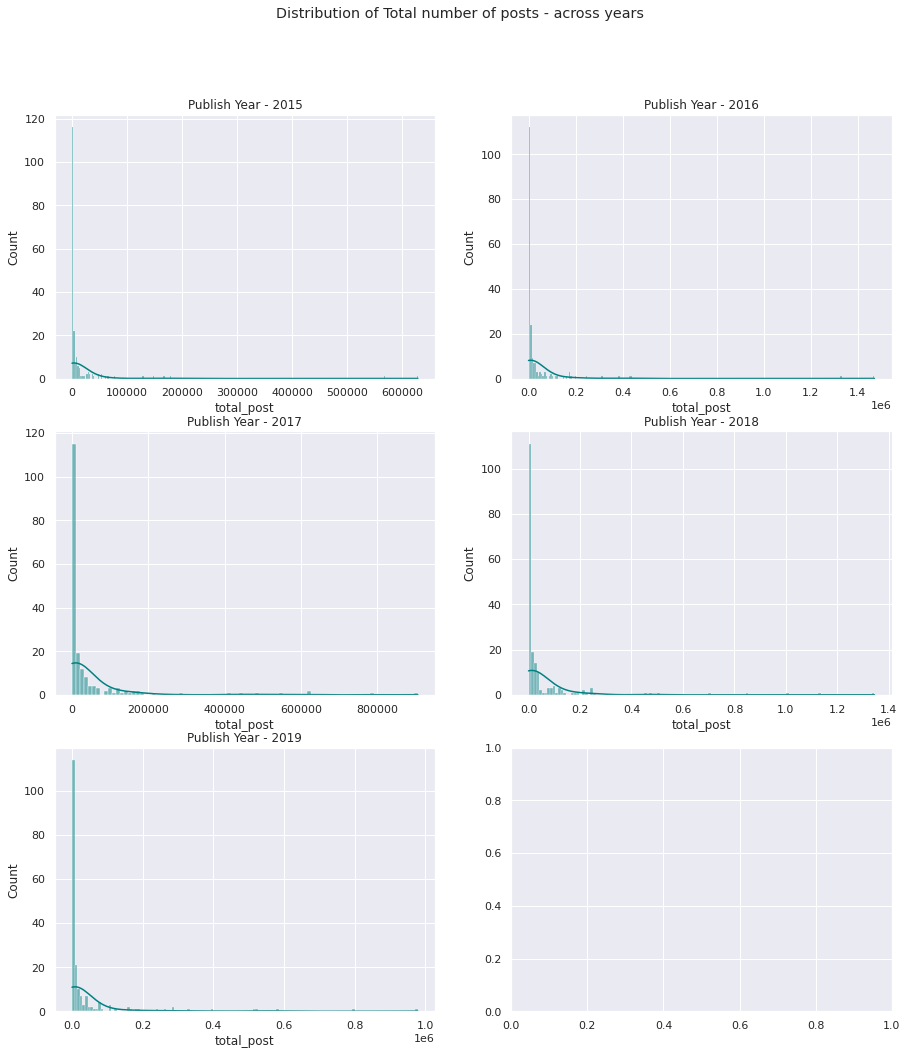

In [155]:
# sns.set_theme(style="whitegrid")
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].set_title("Publish Year - 2015")
axs[0, 1].set_title("Publish Year - 2016")
axs[1, 0].set_title("Publish Year - 2017")
axs[1, 1].set_title("Publish Year - 2018")
axs[2, 0].set_title("Publish Year - 2019")

plt.suptitle('Distribution of Total number of posts - across years')
plt.subplots_adjust(bottom=0.05)

#fig.tight_layout()

sns.histplot(data=df_yearly[df_yearly.publish_year==2015], x="total_post", kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df_yearly[df_yearly.publish_year==2016], x="total_post", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df_yearly[df_yearly.publish_year==2017], x="total_post", kde=True, color="teal", ax=axs[1,0])
sns.histplot(data=df_yearly[df_yearly.publish_year==2018], x="total_post", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_yearly[df_yearly.publish_year==2019], x="total_post", kde=True, color="teal", ax=axs[2, 0])

plt.show()

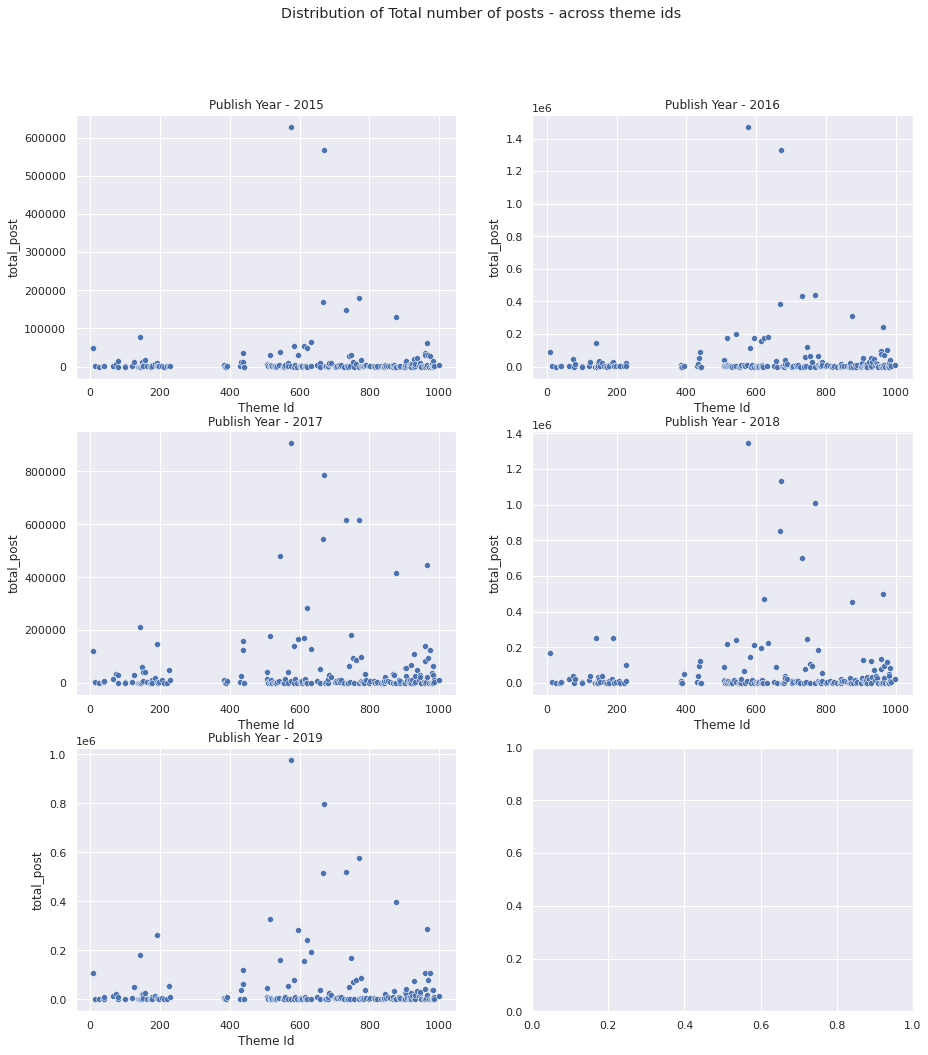

In [162]:
# sns.set_theme(style="whitegrid")
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].set_title("Publish Year - 2015")
axs[0, 1].set_title("Publish Year - 2016")
axs[1, 0].set_title("Publish Year - 2017")
axs[1, 1].set_title("Publish Year - 2018")
axs[2, 0].set_title("Publish Year - 2019")

plt.suptitle('Distribution of Total number of posts - across theme ids')
plt.subplots_adjust(bottom=0.05)

#fig.tight_layout()

sns.scatterplot(data=df_sm[df_sm['publish_year']==2015].groupby('Theme Id').sum().reset_index(), x = 'Theme Id',y='total_post',ax=axs[0, 0])
sns.scatterplot(data=df_sm[df_sm['publish_year']==2016].groupby('Theme Id').sum().reset_index(), x = 'Theme Id',y='total_post',ax=axs[0, 1])
sns.scatterplot(data=df_sm[df_sm['publish_year']==2017].groupby('Theme Id').sum().reset_index(), x = 'Theme Id',y='total_post',ax=axs[1, 0])
sns.scatterplot(data=df_sm[df_sm['publish_year']==2018].groupby('Theme Id').sum().reset_index(), x = 'Theme Id',y='total_post',ax=axs[1, 1])
sns.scatterplot(data=df_sm[df_sm['publish_year']==2019].groupby('Theme Id').sum().reset_index(), x = 'Theme Id',y='total_post',ax=axs[2, 0])

plt.show()

In [74]:
#df_weekly = df_sm.groupby(['publish_week','Theme Id']).sum()['total_post'].reset_index().sort_values(by=['publish_week','total_post'])
#df_weekly.head()

In [221]:
df_sm.corr()

,Theme Id,total_post,publish_year,publish_month,publish_week
Theme Id,1.000,0.026,-0.000,-0.000,-0.000
total_post,0.026,1.000,0.027,-0.002,-0.003
publish_year,-0.000,0.027,1.000,-0.136,-0.146
publish_month,-0.000,-0.002,-0.136,1.000,0.978
publish_week,-0.000,-0.003,-0.146,0.978,1.000


## Google search data

In [120]:
df_gs = input_read('files/google_search_data.csv')

Shape of google_search_data : (181565, 6)

List of columns in google_search_data : Index(['date', 'platform', 'searchVolume', 'Claim_ID', 'week_number',
       'year_new'],
      dtype='object')

Datatype of columns in google_search_data :
date            object
platform        object
searchVolume     int64
Claim_ID         int64
week_number      int64
year_new         int64
dtype: object


In [121]:
df_gs_bkp = df_gs.copy()

In [122]:
df_gs.head()

,date,platform,searchVolume,Claim_ID,week_number,year_new
0,05-01-2014,google,349,916,1,2014
1,06-01-2014,google,349,916,2,2014
2,07-01-2014,google,697,916,2,2014
3,10-01-2014,google,349,916,2,2014
4,20-01-2014,google,697,916,4,2014


In [123]:
print('Size of the data:',df_gs.shape)
print('Total number of unique Theme Ids in Google Search Data:',df_gs['Claim_ID'].nunique())
print('List of themes available in Google Search Data:', list(sorted(df_gs['Claim_ID'].unique())))
print('Percentage of records with missing values in theme id:',round(df_gs[df_gs['Claim_ID'].isnull()].shape[0]*100/df_gs.shape[0],2),'%')

Size of the data: (181565, 6)
Total number of unique Theme Ids in Google Search Data: 160
List of themes available in Google Search Data: [8, 39, 40, 65, 75, 79, 81, 100, 101, 120, 125, 138, 139, 142, 148, 151, 152, 158, 163, 173, 177, 187, 191, 192, 193, 197, 207, 211, 227, 228, 384, 393, 430, 433, 437, 438, 507, 509, 510, 514, 516, 519, 526, 531, 536, 541, 543, 555, 556, 558, 566, 567, 574, 576, 583, 587, 594, 600, 601, 605, 606, 608, 613, 615, 616, 618, 620, 622, 632, 634, 650, 657, 659, 668, 670, 677, 681, 682, 683, 684, 689, 702, 704, 707, 713, 716, 720, 732, 737, 738, 741, 743, 747, 754, 755, 761, 770, 777, 780, 782, 785, 788, 789, 799, 803, 813, 816, 821, 823, 832, 839, 842, 843, 844, 847, 852, 860, 867, 869, 870, 877, 884, 887, 889, 900, 901, 903, 904, 906, 907, 908, 913, 915, 916, 918, 922, 928, 929, 930, 931, 937, 941, 944, 946, 948, 958, 959, 964, 965, 967, 970, 974, 977, 979, 980, 981, 982, 984, 985, 999]
Percentage of records with missing values in theme id: 0.0 %


In [124]:
df_gs['Claim_ID'].nunique()

160

In [125]:
df_gs.isnull().sum()

date            0
platform        0
searchVolume    0
Claim_ID        0
week_number     0
year_new        0
dtype: int64

In [126]:
df_gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          181565 non-null  object
 1   platform      181565 non-null  object
 2   searchVolume  181565 non-null  int64 
 3   Claim_ID      181565 non-null  int64 
 4   week_number   181565 non-null  int64 
 5   year_new      181565 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.3+ MB


In [127]:
df_gs.year_new.value_counts()

2018    51388
2019    38682
2017    27399
2016    22280
2015    21372
2014    20444
Name: year_new, dtype: int64

In [128]:
df_gs.describe()

,searchVolume,Claim_ID,week_number,year_new
count,181565.000,181565.000,181565.000,181565.000
mean,5823.349,629.558,25.170,2017.013
std,11251.075,284.427,14.614,1.656
min,1.000,8.000,1.000,2014.000
25%,281.000,516.000,13.000,2016.000
50%,1173.000,670.000,25.000,2017.000
75%,5539.000,901.000,37.000,2018.000
max,370484.000,999.000,53.000,2019.000


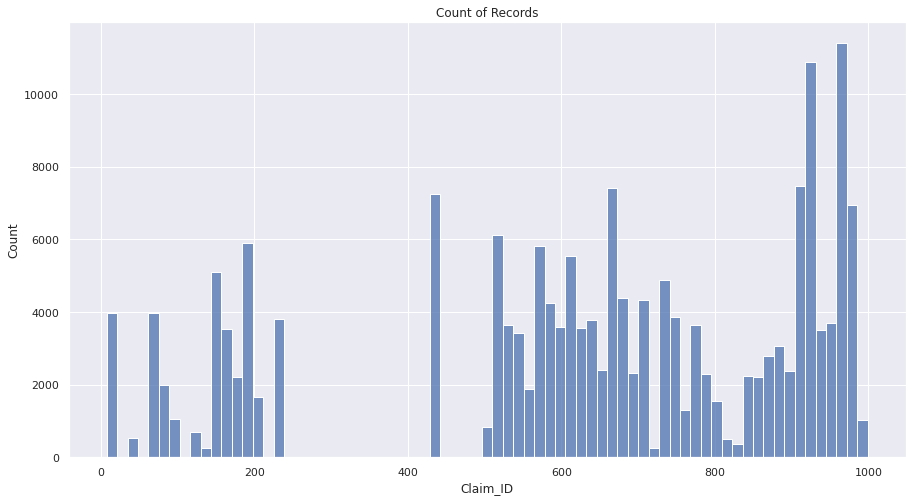

In [130]:
fig = plt.figure() 
fig.set_size_inches(15, 8)
sns.histplot(data=df_gs, x = 'Claim_ID')
plt.title('Count of Records')
plt.show()

In [144]:
data  = df_gs.groupby(['year_new','Claim_ID','platform']).count().reset_index().sort_values(by=['Claim_ID','year_new','searchVolume'])
data[data.searchVolume>380][['Claim_ID','year_new','searchVolume','platform']]

,Claim_ID,year_new,searchVolume,platform
468,788,2017,417,google
111,967,2014,629,google
229,967,2015,657,google
364,967,2016,661,google
514,967,2017,710,google
888,967,2018,439,chewy
887,967,2018,493,amazon
889,967,2018,701,google
1263,967,2019,392,amazon
1265,967,2019,514,google


In [131]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_gs.groupby('Claim_ID').sum().reset_index()['searchVolume'].describe()

count         160.000
mean      6608227.619
std      16628006.439
min             3.000
25%          6666.500
50%        298011.500
75%       2738163.000
max     113502487.000
Name: searchVolume, dtype: float64

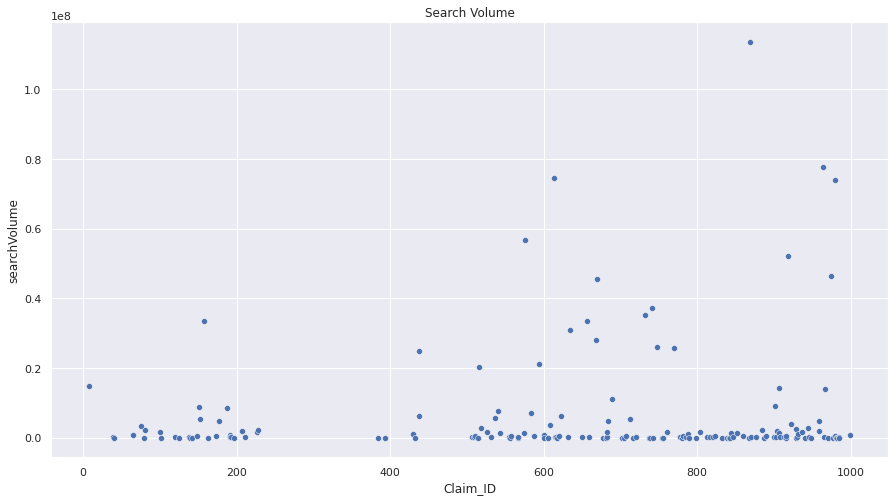

In [188]:
fig = plt.figure() 
fig.set_size_inches(15, 8)
sns.scatterplot(data=df_gs.groupby('Claim_ID').sum().reset_index(), x = 'Claim_ID',y='searchVolume')
plt.title('Search Volume')
plt.show()

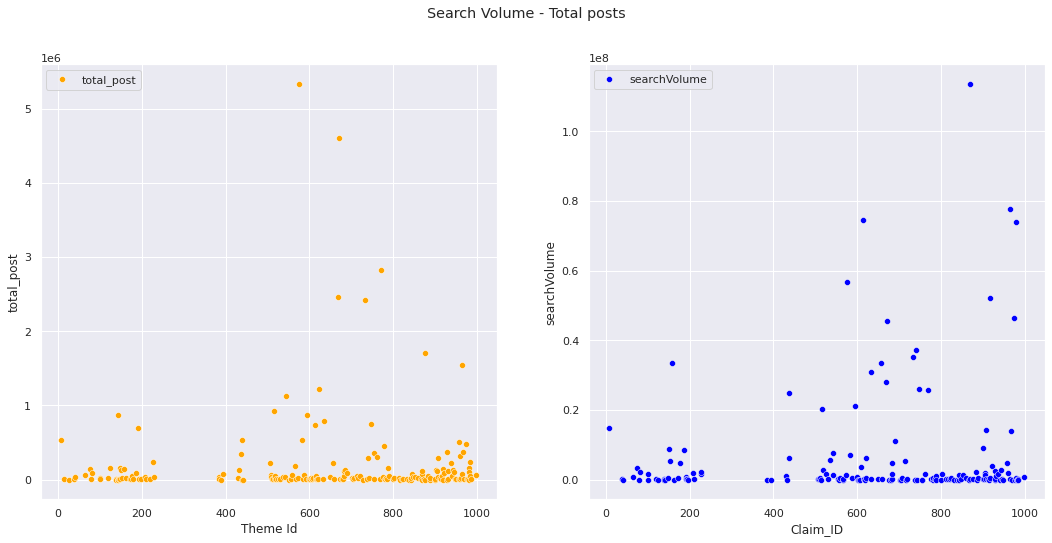

In [208]:
#fig = plt.figure() 
#fig.set_size_inches(15, 8)
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(18, 8)
sns.scatterplot(data=df_sm.groupby('Theme Id').sum().reset_index(), x = 'Theme Id',y='total_post', color='orange',ax=axs[0])
sns.scatterplot(data=df_gs.groupby('Claim_ID').sum().reset_index(), x = 'Claim_ID',y='searchVolume', color='blue',ax=axs[1])
axs[0].legend(['total_post'],loc='top left')
axs[1].legend(['searchVolume'])

plt.suptitle('Search Volume - Total posts')
plt.show()

In [133]:
df_gs.groupby('Claim_ID', dropna=False).sum().sort_values(by='searchVolume', ascending=False)['searchVolume']

Claim_ID
869    113502487
964     77711760
613     74588723
980     73957180
576     56756609
         ...    
799           11
941            5
514            3
832            3
681            3
Name: searchVolume, Length: 160, dtype: int64

In [134]:
df_gs['date'] = df_gs['date'].apply(lambda x: datetime.strptime(x,'%d-%m-%Y') if type(x)==str else x)

In [135]:
df_gs['search_year'] = df_gs['date'].apply(lambda x:x.year)
df_gs['search_month'] = df_gs['date'].apply(lambda x:x.month)
df_gs['search_week'] = df_gs['date'].apply(lambda x:x.isocalendar()[1])

In [136]:
print(df_gs['platform'].value_counts())

google     138115
amazon      23828
chewy       13352
walmart      6270
Name: platform, dtype: int64


In [145]:
df_gs.columns

Index(['date', 'platform', 'searchVolume', 'Claim_ID', 'week_number',
       'year_new', 'search_year', 'search_month', 'search_week'],
      dtype='object')

In [138]:
df_gs[df_gs.search_year!=df_gs.year_new]

,date,platform,searchVolume,Claim_ID,week_number,year_new,search_year,search_month,search_week
424,2014-12-29,google,5341,8,1,2015,2014,12,1
425,2014-12-30,google,5977,8,1,2015,2014,12,1
426,2014-12-31,google,4197,8,1,2015,2014,12,1
588,2014-12-29,google,271,39,1,2015,2014,12,1
1144,2014-12-29,google,5755,747,1,2015,2014,12,1
...,...,...,...,...,...,...,...,...,...
141018,2018-12-31,amazon,76,732,1,2019,2018,12,1
141070,2018-12-31,amazon,189,75,1,2019,2018,12,1
141691,2018-12-31,chewy,38,904,1,2019,2018,12,1
142059,2018-12-31,chewy,38,918,1,2019,2018,12,1


In [146]:
#df_gs.loc[((df_gs.search_week==1)|(df_gs.search_week==53)|(df_gs.search_week==52)) & (df_gs.search_month==12), 'search_year'] = df_gs.search_year+1
df_gs_yearly = df_gs.groupby(['search_year','Claim_ID']).sum()['searchVolume'].reset_index().sort_values(by=['search_year','searchVolume'])
df_gs_yearly.head()

,search_year,Claim_ID,searchVolume
100,2014,928,2
70,2014,754,4
96,2014,915,9
63,2014,702,30
91,2014,903,60


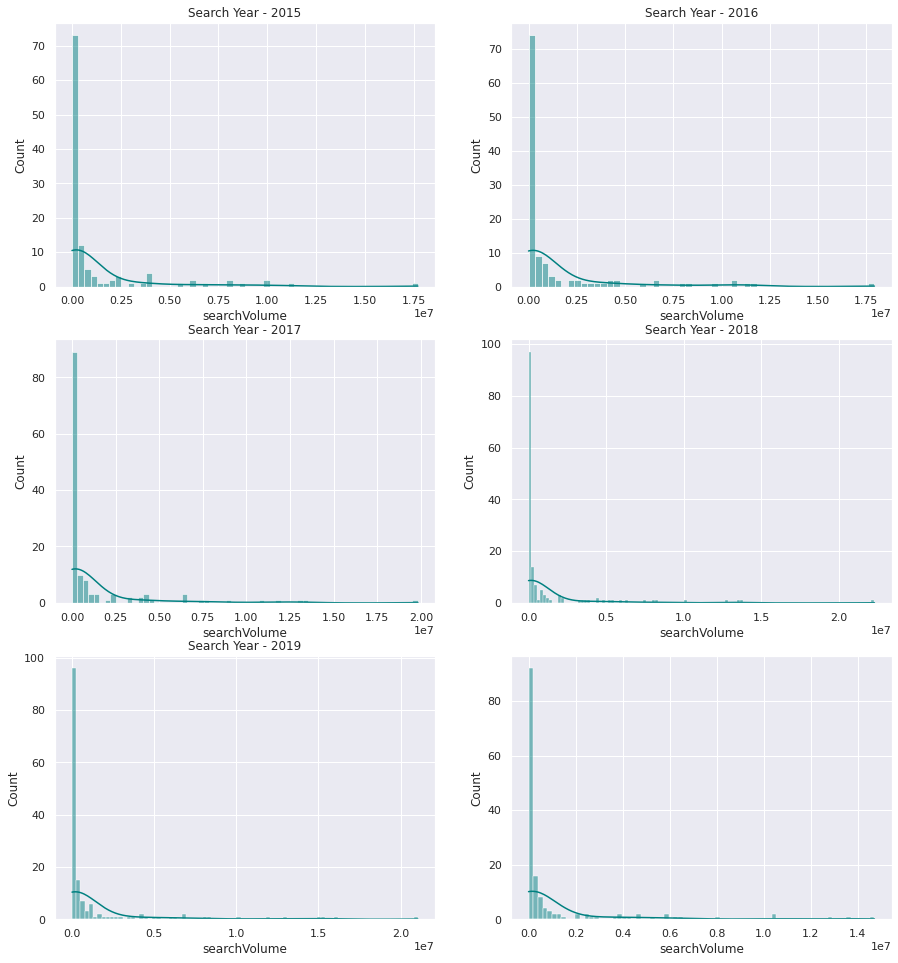

In [148]:
# sns.set_theme(style="whitegrid")
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].set_title("Search Year - 2015")
axs[0, 1].set_title("Search Year - 2016")
axs[1, 0].set_title("Search Year - 2017")
axs[1, 1].set_title("Search Year - 2018")
axs[2, 0].set_title("Search Year - 2019")

plt.subplots_adjust(bottom=0.05)
#fig.tight_layout()

sns.histplot(data=df_gs_yearly[df_gs_yearly.search_year==2014], x="searchVolume", kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df_gs_yearly[df_gs_yearly.search_year==2015], x="searchVolume", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df_gs_yearly[df_gs_yearly.search_year==2016], x="searchVolume", kde=True, color="teal", ax=axs[1,0])
sns.histplot(data=df_gs_yearly[df_gs_yearly.search_year==2017], x="searchVolume", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_gs_yearly[df_gs_yearly.search_year==2018], x="searchVolume", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=df_gs_yearly[df_gs_yearly.search_year==2019], x="searchVolume", kde=True, color="teal", ax=axs[2, 1])

plt.show()

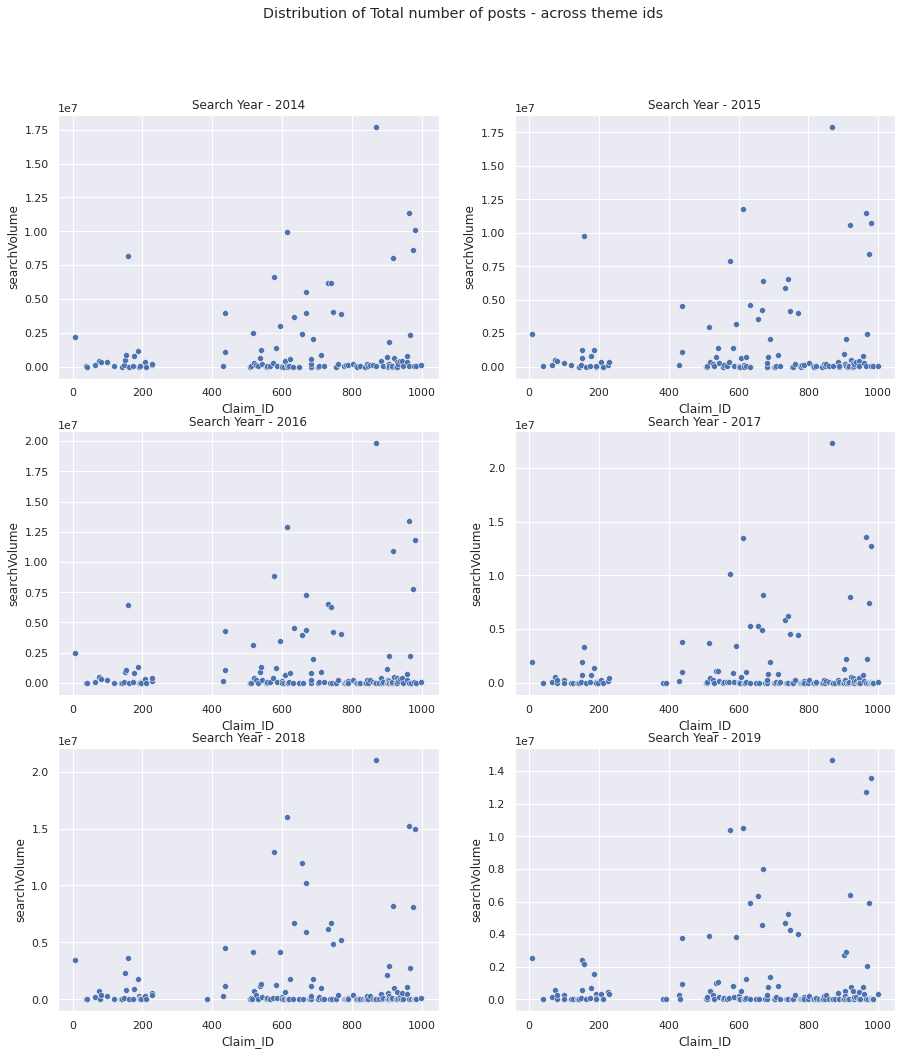

In [166]:
# sns.set_theme(style="whitegrid")
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].set_title("Search Year - 2014")
axs[0, 1].set_title("Search Year - 2015")
axs[1, 0].set_title("Search Yearr - 2016")
axs[1, 1].set_title("Search Year - 2017")
axs[2, 0].set_title("Search Year - 2018")
axs[2, 1].set_title("Search Year - 2019")

plt.suptitle('Distribution of Total number of posts - across theme ids')
plt.subplots_adjust(bottom=0.05)

#fig.tight_layout()

sns.scatterplot(data=df_gs[df_gs['search_year']==2014].groupby('Claim_ID').sum().reset_index(), x = 'Claim_ID',y='searchVolume',ax=axs[0, 0])
sns.scatterplot(data=df_gs[df_gs['search_year']==2015].groupby('Claim_ID').sum().reset_index(), x = 'Claim_ID',y='searchVolume',ax=axs[0, 1])
sns.scatterplot(data=df_gs[df_gs['search_year']==2016].groupby('Claim_ID').sum().reset_index(), x = 'Claim_ID',y='searchVolume',ax=axs[1, 0])
sns.scatterplot(data=df_gs[df_gs['search_year']==2017].groupby('Claim_ID').sum().reset_index(), x = 'Claim_ID',y='searchVolume',ax=axs[1, 1])
sns.scatterplot(data=df_gs[df_gs['search_year']==2018].groupby('Claim_ID').sum().reset_index(), x = 'Claim_ID',y='searchVolume',ax=axs[2, 0])
sns.scatterplot(data=df_gs[df_gs['search_year']==2019].groupby('Claim_ID').sum().reset_index(), x = 'Claim_ID',y='searchVolume',ax=axs[2, 1])

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

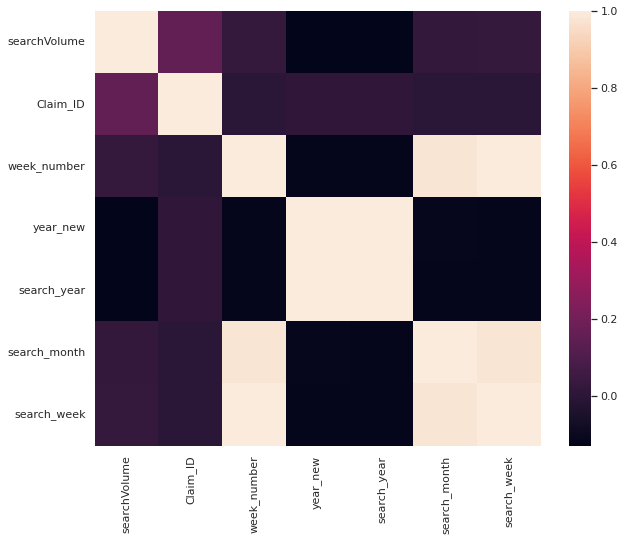

In [226]:
plt.figure().set_size_inches(10, 8)
sns.heatmap(df_gs.corr())
plt.show

## Sales Data

In [167]:
df_sales = input_read('files/sales_data.csv')

Shape of sales_data : (4526182, 5)

List of columns in sales_data : Index(['system_calendar_key_N', 'product_id', 'sales_dollars_value',
       'sales_units_value', 'sales_lbs_value'],
      dtype='object')

Datatype of columns in sales_data :
system_calendar_key_N      int64
product_id                 int64
sales_dollars_value      float64
sales_units_value          int64
sales_lbs_value            int64
dtype: object


In [168]:
df_sales_bkp = df_sales.copy()

In [169]:
df_sales.head()

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1,13927.000,934,18680
1,20160109,3,10289.000,1592,28646
2,20160109,4,357.000,22,440
3,20160109,6,23113.000,2027,81088
4,20160109,7,23177.000,3231,58164


In [170]:
df_sales.isnull().sum()

system_calendar_key_N    0
product_id               0
sales_dollars_value      0
sales_units_value        0
sales_lbs_value          0
dtype: int64

In [171]:
df_sales.describe()

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
count,4526182.000,4526182.000,4526182.000,4526182.000,4526182.000
mean,20175054.752,28858.569,21594.541,5160.053,17153.392
std,10735.371,15312.537,78180.566,26853.408,127340.124
min,20160109.000,1.000,0.000,1.000,0.000
25%,20161231.000,15069.000,523.000,80.000,86.000
50%,20171209.000,29981.000,2655.000,403.000,611.000
75%,20181103.000,41513.000,11765.000,1807.000,3770.000
max,20191005.000,57317.000,4395964.000,873998.000,11003100.000


In [177]:
df_sales['product_id'].nunique()

42616

In [172]:
df_sales['year'] = df_sales['system_calendar_key_N'].apply(lambda x: int(str(x)[:4]))

In [173]:
df_sales['year'].value_counts()

2018    1248368
2017    1206939
2016    1132156
2019     938719
Name: year, dtype: int64

## Theme list

In [175]:
df_themes = input_read('files/Theme_list.csv')

Shape of Theme_list : (208, 2)

List of columns in Theme_list : Index(['CLAIM_ID', 'Claim Name'], dtype='object')

Datatype of columns in Theme_list :
CLAIM_ID       int64
Claim Name    object
dtype: object


In [178]:
df_themes.head()

,CLAIM_ID,Claim Name
0,0,No Claim
1,8,low carb
2,15,beans
3,16,cocoa
4,26,vanilla


In [180]:
df_themes.CLAIM_ID.nunique()

208

## Theme product List

In [181]:
df_theme_prod = input_read('files/Theme_product_list.csv')

Shape of Theme_product_list : (91485, 2)

List of columns in Theme_product_list : Index(['PRODUCT_ID', 'CLAIM_ID'], dtype='object')

Datatype of columns in Theme_product_list :
PRODUCT_ID    int64
CLAIM_ID      int64
dtype: object


In [182]:
df_theme_prod.head()

,PRODUCT_ID,CLAIM_ID
0,26,8
1,29,8
2,48,81
3,50,81
4,74,227


In [210]:
print('Number of unique Products:',df_theme_prod.PRODUCT_ID.nunique())
print('Number of unique Themes:',df_theme_prod.CLAIM_ID.nunique())

Number of unique Products: 57317
Number of unique Themes: 51


## Product Manufacturer

In [211]:
df_manufacture = input_read('files/product_manufacturer_list.csv')

Shape of product_manufacturer_list : (67175, 7)

List of columns in product_manufacturer_list : Index(['PRODUCT_ID', 'Vendor', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

Datatype of columns in product_manufacturer_list :
PRODUCT_ID      int64
Vendor         object
Unnamed: 2    float64
Unnamed: 3    float64
Unnamed: 4    float64
Unnamed: 5    float64
Unnamed: 6    float64
dtype: object


In [212]:
df_manufacture = df_manufacture[['PRODUCT_ID','Vendor']]

In [213]:
df_manufacture.head()

,PRODUCT_ID,Vendor
0,1,Others
1,2,Others
2,3,Others
3,4,Others
4,5,Others


In [214]:
print(df_theme_prod.PRODUCT_ID.nunique())
print(df_manufacture.PRODUCT_ID.nunique())

57317
67175


In [227]:
df_theme_prod.CLAIM_ID.nunique()

51

In [228]:
67175-57317

9858

In [229]:
#combining product manufacturer information with sales data
df_mid = pd.merge(df_theme_prod,df_manufacture, how='right', on='PRODUCT_ID' )

In [256]:
df_manufacture[df_manufacture['PRODUCT_ID'].isin(df_theme_prod['PRODUCT_ID'])]['PRODUCT_ID'].nunique()

57317

In [230]:
df_mid[df_mid.CLAIM_ID.isnull()].Vendor.value_counts()

Private Label    9327
Others            421
A                  65
B                  19
D                  16
F                   8
H                   2
Name: Vendor, dtype: int64

In [233]:
df_mid.head()

,PRODUCT_ID,CLAIM_ID,Vendor
0,1,0.000,Others
1,2,0.000,Others
2,3,0.000,Others
3,4,0.000,Others
4,5,0.000,Others


In [232]:
print(df_themes.CLAIM_ID.nunique())
df_mid.CLAIM_ID.nunique()

208


51

In [240]:
df_mid.isnull().sum()

PRODUCT_ID       0
CLAIM_ID      9858
Vendor           0
dtype: int64

In [245]:
mid1_df = pd.merge(df_mid,df_themes, how='left', on='CLAIM_ID')

In [246]:
mid1_df.head()

,PRODUCT_ID,CLAIM_ID,Vendor,Claim Name
0,1,0.000,Others,No Claim
1,2,0.000,Others,No Claim
2,3,0.000,Others,No Claim
3,4,0.000,Others,No Claim
4,5,0.000,Others,No Claim


In [247]:
mid1_df.isnull().sum()

PRODUCT_ID       0
CLAIM_ID      9858
Vendor           0
Claim Name    9858
dtype: int64

In [241]:
mid1_df.head()

,PRODUCT_ID,CLAIM_ID,Vendor,Claim Name
0,1,0.000,Others,No Claim
1,2,0.000,Others,No Claim
2,3,0.000,Others,No Claim
3,4,0.000,Others,No Claim
4,5,0.000,Others,No Claim


In [242]:
df_sales.head()

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value,year
0,20160109,1,13927.000,934,18680,2016
1,20160109,3,10289.000,1592,28646,2016
2,20160109,4,357.000,22,440,2016
3,20160109,6,23113.000,2027,81088,2016
4,20160109,7,23177.000,3231,58164,2016


In [250]:
final_df = pd.merge(df_sales,mid1_df, how='left', left_on='product_id',right_on='PRODUCT_ID')

In [251]:
final_df.head()

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value,year,PRODUCT_ID,CLAIM_ID,Vendor,Claim Name
0,20160109,1,13927.000,934,18680,2016,1,0.000,Others,No Claim
1,20160109,3,10289.000,1592,28646,2016,3,0.000,Others,No Claim
2,20160109,4,357.000,22,440,2016,4,0.000,Others,No Claim
3,20160109,6,23113.000,2027,81088,2016,6,0.000,Others,No Claim
4,20160109,7,23177.000,3231,58164,2016,7,0.000,Others,No Claim


In [252]:
final_df.isnull().sum()

system_calendar_key_N    0
product_id               0
sales_dollars_value      0
sales_units_value        0
sales_lbs_value          0
year                     0
PRODUCT_ID               0
CLAIM_ID                 0
Vendor                   0
Claim Name               0
dtype: int64

In [ ]:
# combining both

combined_df = pd.merge(df_sm,df_gs, how = 'inner', left_on =['Theme Id','publish_year','publish_week'], right_on = ['Claim_ID','search_year','search_week'])

In [ ]:
combined_df.shape

(1074156, 15)

In [ ]:
combined_df.head()

,Theme Id,published_date,total_post,publish_year,publish_month,publish_week,date,platform,searchVolume,Claim_ID,week_number,year_new,search_year,search_month,search_week
0,148.0,2015-01-10,76,2015,1,2,2015-01-09,google,342,148,2,2015,2015,1,2
1,148.0,2015-01-10,76,2015,1,2,2015-01-10,google,342,148,2,2015,2015,1,2
2,148.0,2015-01-11,6,2015,1,2,2015-01-09,google,342,148,2,2015,2015,1,2
3,148.0,2015-01-11,6,2015,1,2,2015-01-10,google,342,148,2,2015,2015,1,2
4,148.0,2015-01-06,2,2015,1,2,2015-01-09,google,342,148,2,2015,2015,1,2


#Value counts
    print("Value counts")
    for column in data.columns:
        print("{} : {}".format(column,data[column].value_counts()))

In [ ]:
# sns.set_theme(style="whitegrid")
sns.set(style="darkgrid")

# sns.boxplot(x=iqr_df['life_expectancy'])
# sns.scatterplot( x=iqr_df.index , y=iqr_df['life_expectancy'] , hue = iqr_df['year'])
# sns.stripplot(y=iqr_df['life_expectancy'])
# sns.distplot(iqr_df['life_expectancy'])
# sns.kdeplot(iqr_df['life_expectancy'], shade=True)
# sns.swarmplot(x=iqr_df['life_expectancy'])

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(data=iqr_df, x="life_expectancy", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=iqr_df, x="adult_mortality", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=iqr_df, x="infant_deaths", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=iqr_df, x="income_composition_of_resources", kde=True, color="teal", ax=axs[1, 1])

plt.show()

In [55]:
# ddf = iqr_df.select_dtypes(include=np.number)
# ddf = ddf.iloc[:,:2]
# cols = ddf.columns.to_list()
# plt.figure(figsize=(5,5))
# plt.boxplot(x=ddf.values,labels=cols)
# # ddf.head()

In [ ]:
def outliers_iqr(data):

    data = np.sort(data)

    q1 = np.percentile(data, 25, interpolation = 'midpoint') 
    q2 = np.percentile(data, 50, interpolation = 'midpoint') 
    q3 = np.percentile(data, 75, interpolation = 'midpoint')

    iqr = q3-q1
    lb  = q1-1*iqr 
    ub  = q3+1*iqr

    # print('Lower bound:',lb)
    # print('Upper bound:',ub)
    result = {'lower_bound':lb,'upper_bound':ub}
    
    # data = [i for i in data if (i>lb) and (i<ub)]
    return result

iqr_df = preprocess(org_df)
print('Dataset length(original):',len(org_df))

colnames_numerics_only = iqr_df.select_dtypes(include=np.number).columns.tolist()

#CAPPING -  Winsorization

for i in colnames_numerics_only:
  res = outliers_iqr(iqr_df[i])
  iqr_df = iqr_df[(iqr_df[i]>=res['lower_bound']) & (iqr_df[i]<=res['upper_bound'])]

print('Dataset length(after IQR outlier removal):',len(iqr_df))